In [1]:
from qoop.backend import utilities
import numpy as np
import qiskit, sys, os
from qiskit.circuit.library import RXGate, RYGate, RZGate
sys.path.insert(0, '../..')
from state_decomposition_func import *

In [26]:
best_circuit = utilities.load_circuit("n=3,d=30,n_circuit=32,n_gen=20/best_circuit_2")

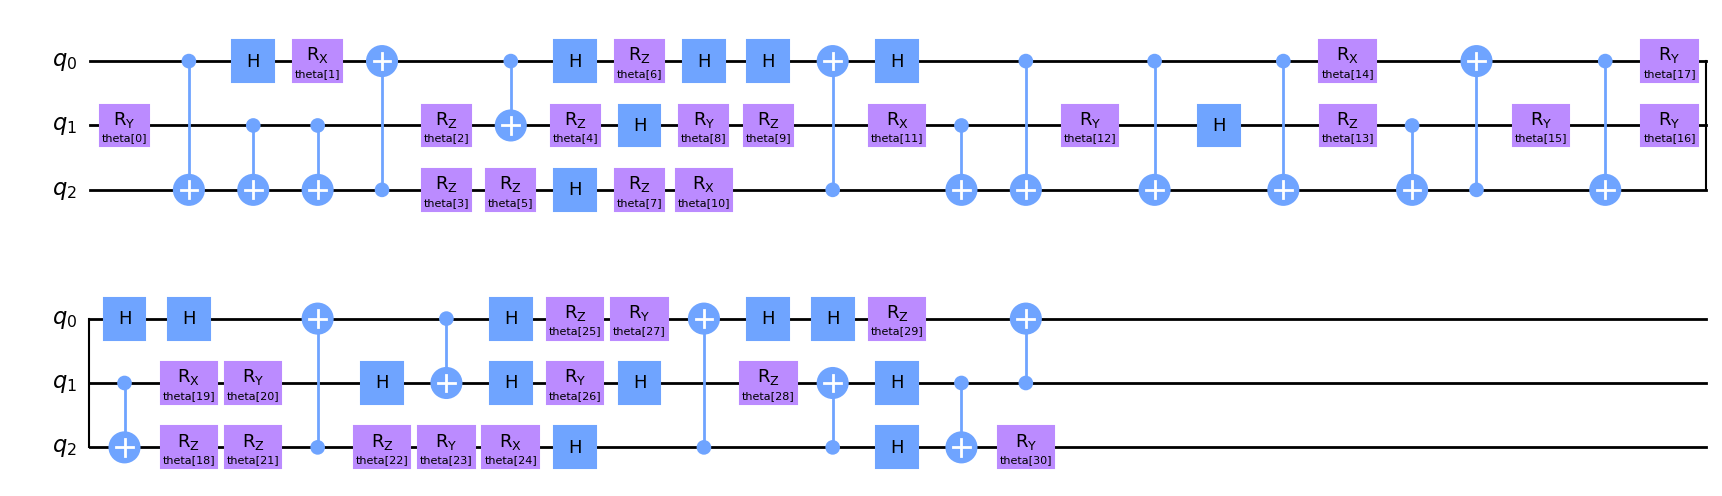

In [27]:
best_circuit.draw('mpl')

In [28]:
Uf = Operator(quantum_circuit(3,'toffoli')).data
print(Uf)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [29]:
from qoop.compilation.qsp import QuantumStatePreparation
from qoop.core import ansatz, state, measure
from qoop.backend import constant, utilities
from qoop.evolution import crossover, mutate, selection, threshold
from qoop.evolution.environment import EEnvironment, EEnvironmentMetadata
from qoop.evolution.utilities import create_params

In [32]:
def compilation_fitness_toffoli(qc: qiskit.QuantumCircuit):
    betas0 = []
    Uf = np.array([[1., 0., 0., 0., 0., 0., 0., 0.],
                   [0., 1., 0., 0., 0., 0., 0., 0.],
                   [0., 0., 1., 0., 0., 0., 0., 0.],
                   [0., 0., 0., 0., 0., 0., 0., 1.],
                   [0., 0., 0., 0., 1., 0., 0., 0.],
                   [0., 0., 0., 0., 0., 1., 0., 0.],
                   [0., 0., 0., 0., 0., 0., 1., 0.],
                   [0., 0., 0., 1., 0., 0., 0., 0.]]) + 0j
    
    qsp = QuantumStatePreparation(
        u=qc,
        target_state= np.conjugate(Uf).T
        ).fit(num_steps=500, metrics_func=['loss_basic'])

    

    betas0.append(1-qsp.compiler.metrics['loss_basic'][-1])
    
    
    return betas0, qsp.thetas

In [33]:
compilation_fitness_toffoli(best_circuit)

([0.8519943551314136],
 array([-2.84595509e-05,  7.85398163e-01,  9.96275725e-01,  1.57079633e+00,
         3.88328354e-01,  1.57079633e+00,  2.33873915e-01,  7.85398154e-01,
         1.32281301e+00,  1.97872674e+00,  1.57079633e+00,  1.25727875e+00,
         1.57079633e+00,  1.47297460e+00,  1.57079633e+00, -4.24442170e-02,
        -4.24442170e-02,  1.80743467e+00,  8.13489890e-01,  1.43701781e-13,
         1.57079633e+00,  8.13489890e-01,  8.13489890e-01,  1.57079633e+00,
         2.97186063e+00,  2.35619453e+00, -2.10877972e-01,  8.62166908e-14,
         1.57079633e+00,  2.35619448e+00,  3.14159265e+00]))

In [24]:
qc = best_circuit
parameter_values = [ 9.64570991e-01,  1.48584033e+00, -2.71678430e-03,  9.64570991e-01,
         3.14100150e+00,  1.20125886e-03,  7.84917996e-01,  7.84917996e-01,
        -2.78952294e-03, -2.61534852e-04,  4.27206932e-01,  3.14083119e+00,
        -1.10263084e-01,  1.17766231e+00, -3.71605992e-03,  1.57455827e+00,
         1.17766231e+00,  2.35397471e+00,  1.57265581e+00,  2.35765013e+00,
         1.61011137e+00,  3.14086558e+00,  1.31646337e+00,  1.56995095e+00,
         1.57040774e+00,  1.76404736e+00,  1.10618761e+00,  2.35633800e+00,
         1.10618761e+00, -1.35062213e-05,  1.88914232e+00,  2.35633800e+00,
         8.95319027e-01,  1.57340287e+00]

U = qiskit.quantum_info.Operator(qc.assign_parameters(parameter_values)).data
n = qc.num_qubits

result = np.abs(np.trace(Uf@np.conjugate(U).T) / 2**n )**2

print(result)

0.8535392636766186


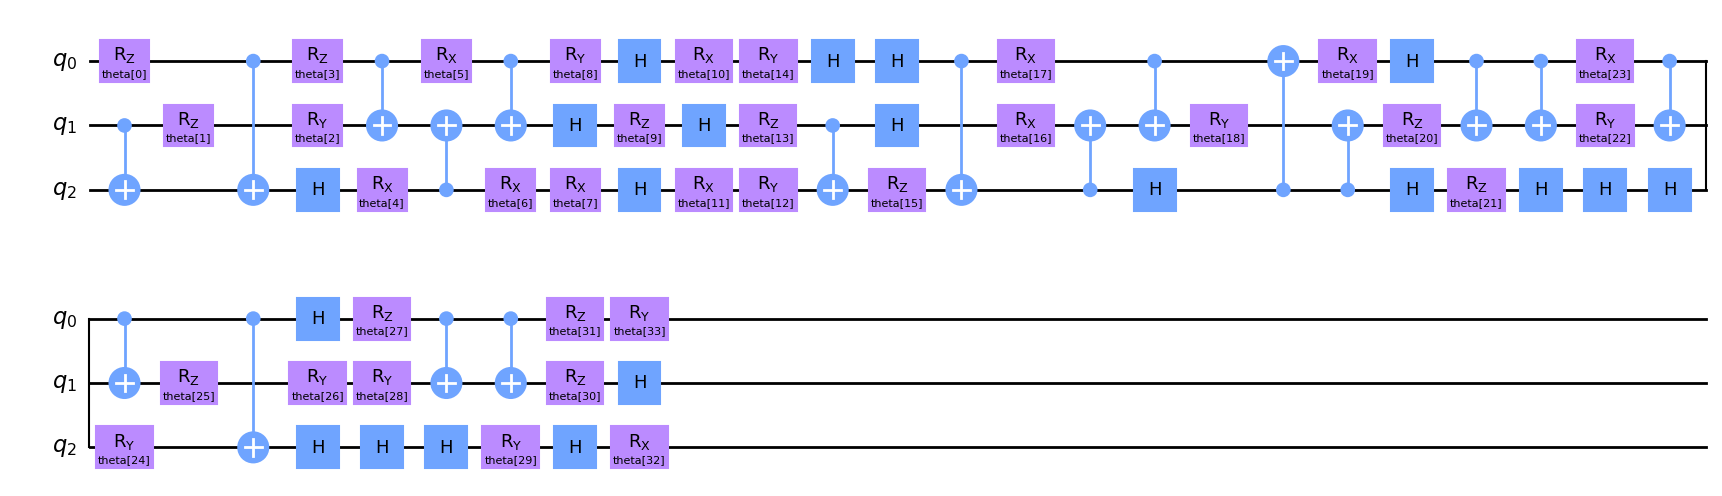

In [25]:
qc.draw('mpl')